# Dimensionality Reduction and Heatmap Visualization

This script demonstrates how to perform dimensionality reduction on a dataset using PCA (Principal Component Analysis) and Factor Analysis, 
and visualize the results with customized colormaps and heatmaps.

## Step 1: Dimensionality Reduction

### 1.1 Loading and Preparing Data

We start by excluding certain columns from the dataset (e.g., metadata, electronic structure data, and mechanical properties) for the analysis.

In [1]:
from FeatureProcessor import DimensionalityReducer
import os

In [2]:
# Columns to exclude from analysis
columns_to_exclude = [
    # Metadata and identifiers
    "formula_pretty", "Class", "material_id", "n",

    # Density of states
    "dos_energy_up", "dos_energy_down",

    # Elastic moduli
    "k_voigt", "k_reuss", "k_vrh",
    "g_voigt", "g_reuss", "g_vrh",

    # Electronic structure
    "cbm", "vbm", "efermi", "e_total", "energy_above_hull",

    # Magnetic and ionic properties
    "min_NfUnfilled", "min_GSmagmom",
    "e_ionic", "e_electronic",

    # Mechanical max stress component
    "e_ij_max"
]

reducer = DimensionalityReducer(
    file_path="PIEmb.csv",
    columns_to_drop=columns_to_exclude,
    n_components=15
)


In [3]:
import warnings

# 忽略所有的 FutureWarning 警告
warnings.simplefilter(action='ignore', category=FutureWarning)
output_directory = os.getcwd()
reducer.load_and_prepare_data()
reducer.standardize()
reducer.apply_pca()
reducer.apply_factor_analysis()
reducer.save_results()

[1/5] Loading and preprocessing data...
✓ Data loaded and preprocessed.


[2/5] Standardizing data...
✓ Data standardized.


[3/5] Applying PCA (extracting 15 components)...
✓ PCA completed.


[4/5] Applying Factor Analysis (extracting 15 common factors)...
✓ Factor Analysis completed.


[5/5] Saving results to CSV files...
✓ Results successfully saved to:
  - PCA    results   : /reduction_outputs/pca_results.csv
  - PCA    loadings  : /reduction_outputs/pca_loadings.csv
  - Factor results   : /reduction_outputs/factor_results.csv
  - Factor loadings  : /reduction_outputs/factor_loadings.csv


### 1.2 Explanation of Steps:
- **Data Loading**: The dataset is loaded and columns not relevant for analysis are dropped.
- **Standardization**: The data is standardized for PCA and Factor Analysis.
- **PCA & Factor Analysis**: These dimensionality reduction techniques are applied to reduce the data into 15 principal components.
- **Saving Results**: The reduced data is saved for later use.





## Step 2: Custom Colormap and Gradient Visualization

We define custom colormaps for Factor Analysis (FA) and use the built-in colormap for PCA. Then, we visualize these gradients.


In [4]:
from FeatureProcessor import PCA_FA_LoadingMatrixHeatmap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
# Set the font to Times New Roman globally
plt.rcParams['font.family'] = 'Times New Roman'

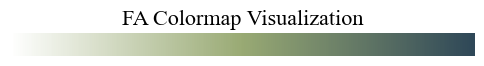

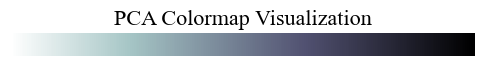

In [5]:
pca_results_path = './reduction_outputs/pca_loadings.csv'
fa_results_path = './reduction_outputs/factor_loadings.csv'

# Define custom colormap for FA (Factor Analysis)
custom_colors = ['white', '#99AA74', '#2F4858']  # Custom colors for FA
Cmap_FA = LinearSegmentedColormap.from_list('custom_cmap_FA', custom_colors)

# Create an example gradient for FA to visualize the colormap
gradient_FA = np.linspace(0, 1, 256).reshape(1, -1)
gradient_FA = np.vstack((gradient_FA, gradient_FA))

# Define colormap for PCA using plt.cm.bone
Cmap_PCA = plt.cm.bone_r  # Colormap for PCA (already available in plt.cm)

# Create an example gradient for PCA to visualize the colormap
gradient_PCA = np.linspace(0, 1, 256).reshape(1, -1)
gradient_PCA = np.vstack((gradient_PCA, gradient_PCA))

# Plot the gradient for FA (Factor Analysis)
plt.figure(figsize=(6, 0.3))
plt.imshow(gradient_FA, aspect='auto', cmap=Cmap_FA)
plt.axis('off')  # Turn off axis
plt.title('FA Colormap Visualization', fontsize=16);
plt.show()

# Plot the gradient for PCA (using plt.cm.bone)
plt.figure(figsize=(6, 0.3))
plt.imshow(gradient_PCA, aspect='auto', cmap=Cmap_PCA)
plt.axis('off')  # Turn off axis
plt.title('PCA Colormap Visualization', fontsize=16);
plt.show()

### 2.1 Explanation of Steps:
- **Custom Colormap for FA**: A custom colormap is created using a blend of white, green, and dark blue colors.
- **PCA Colormap**: The built-in `bone_r` colormap is used for PCA.
- **Gradient Visualization**: We generate and display gradients for both FA and PCA to visualize how the colormap behaves.





## Step 3: Heatmap Generation for PCA and Factor Analysis

We use the `PCA_FA_LoadingMatrixHeatmap` class to load the reduced data and generate heatmaps for PCA and Factor Analysis.

In [6]:
# Create an instance of PCA_FA_LoadingMatrixHeatmap
PCA_heatmap_generator = PCA_FA_LoadingMatrixHeatmap(
    csv_filepath=pca_results_path, 
    color_map="bone_r", 
    output_dir='./figures/'
)

# Load data and plot heatmap
PCA_data = PCA_heatmap_generator.load_data()  # Load the data
PCA_data

[1/2] Loading data...
✓ Data loaded.




nsites  nelements    volume   density  density_atomic  \
PC1   0.054573   0.086117  0.028501  0.076619        0.028444   
PC2   0.025573   0.016974  0.012836  0.084838        0.001396   
PC3   0.041702   0.004771  0.039747  0.007538        0.009930   
PC4   0.014976   0.033318  0.034242  0.014610        0.035063   
PC5   0.058795   0.018646  0.057289  0.038669        0.004160   
PC6   0.007962   0.037864  0.019106  0.009566        0.004968   
PC7   0.033008   0.070820  0.011665  0.063708        0.010988   
PC8   0.031818   0.030715  0.061449  0.002658        0.019841   
PC9   0.018999   0.065467  0.010892  0.004130        0.023930   
PC10  0.028966   0.025659  0.048934  0.004334        0.025192   
PC11  0.024867   0.016434  0.011248  0.044526        0.043699   
PC12  0.064324   0.071866  0.024553  0.029886        0.021115   
PC13  0.033597   0.067631  0.078072  0.148522        0.115571   
PC14  0.062818   0.127256  0.120843  0.087652        0.169259   
PC15  0.034429   0.000743  0.018849  0.006163        0.060297   

      uncorrected_energy_per_atom  energy_per_atom  formation_energy_per_atom  \
PC1                      0.034367         0.047130                   0.096736   
PC2                      0.036921         0.035633                   0.045171   
PC3                      0.025248         0.026932                   0.006061   
PC4                      0.114748         0.117119                   0.058738   
PC5                      0.003171         0.016324                   0.022608   
PC6                      0.096508         0.084887                   0.058233   
PC7                      0.073978         0.081220                   0.000835   
PC8                      0.015040         0.019339                   0.013271   
PC9                      0.034699         0.038295                   0.054410   
PC10                     0.054654         0.045532                   0.006746   
PC11                     0.034784         0.039928                   0.012563   
PC12                     0.040527         0.036589                   0.032654   
PC13                     0.138773         0.133648                   0.049845   
PC14                     0.029472         0.023944                   0.066831   
PC15                     0.091691         0.091121                   0.036298   

      band_gap  total_magnetization  ...  max_SpaceGroupNumber  \
PC1   0.062142             0.020634  ...              0.027069   
PC2   0.011312             0.015615  ...              0.004721   
PC3   0.020287             0.005155  ...              0.077026   
PC4   0.033210             0.066454  ...              0.021681   
PC5   0.037899             0.046910  ...              0.010708   
PC6   0.001347             0.003724  ...              0.004821   
PC7   0.053938             0.053790  ...              0.074856   
PC8   0.019965             0.024109  ...              0.049107   
PC9   0.039369             0.066576  ...              0.054302   
PC10  0.022126             0.044907  ...              0.080823   
PC11  0.035681             0.065403  ...              0.026906   
PC12  0.051644             0.037633  ...              0.029793   
PC13  0.007206             0.003028  ...              0.029636   
PC14  0.004856             0.014163  ...              0.008788   
PC15  0.021073             0.031884  ...              0.016324   

      min_SpaceGroupNumber  most_SpaceGroupNumber  frac_sValence  \
PC1               0.103682               0.101031       0.038280   
PC2               0.015009               0.021833       0.065083   
PC3               0.028783               0.030655       0.027433   
PC4               0.010279               0.034775       0.068559   
PC5               0.058469               0.060173       0.097779   
PC6               0.043529               0.086660       0.027846   
PC7               0.029223               0.034127       0.108643   
PC8               0.058659               0.027557       0.116938   
P

[2/2] Generating the heatmap of the loading matrix...




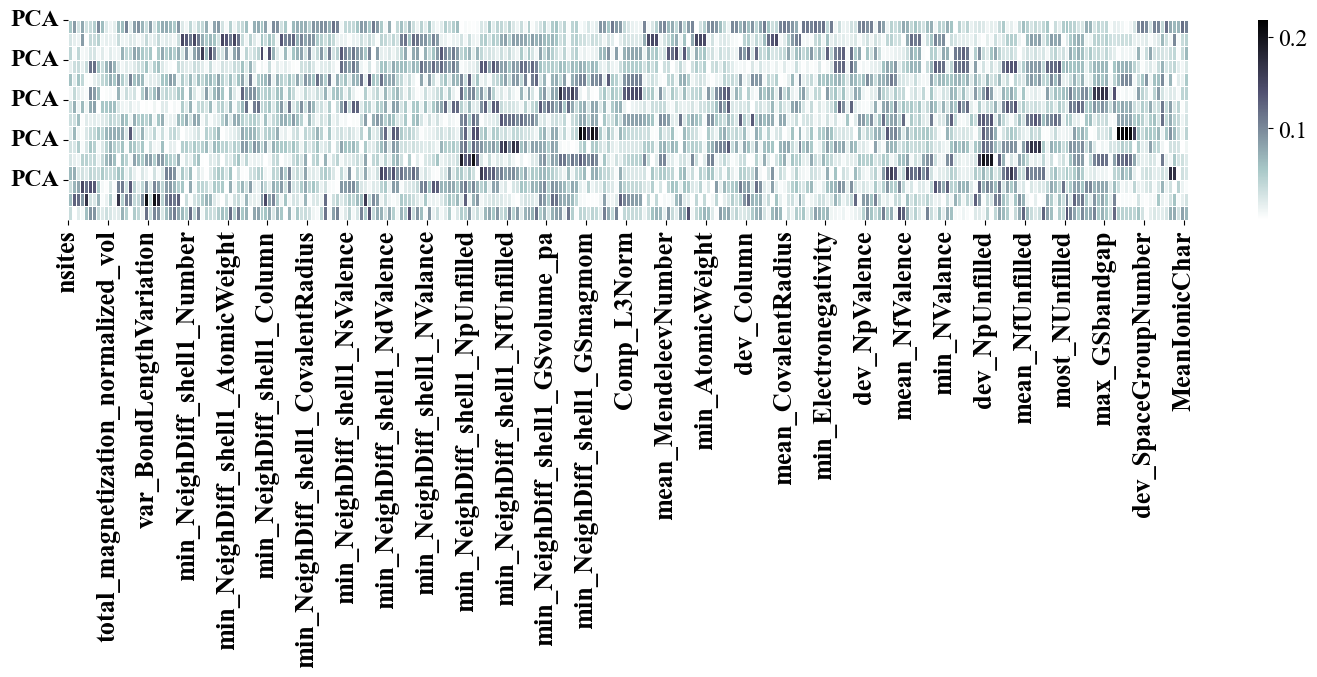



✓ Heatmap successfully generated.
✓ Figure saved at: ./figures/PCA_LoadingMatrix_Heatmap.svg


In [7]:
PCA_heatmap_generator.plot_heatmap(method="PCA")  # Plot the heatmap

In [8]:
# Create an instance of PCA_FA_LoadingMatrixHeatmap
FA_heatmap_generator = PCA_FA_LoadingMatrixHeatmap(
    csv_filepath=fa_results_path, 
    color_map=Cmap_FA, 
    output_dir='./figures/'
)

# Load data and plot heatmap
FA_data = FA_heatmap_generator.load_data()  # Load the data
FA_data

[1/2] Loading data...
✓ Data loaded.




nsites  nelements    volume   density  density_atomic  \
F1   0.363775   0.511841  0.225271  0.349136        0.202736   
F2   0.046515   0.104754  0.018179  0.426322        0.011814   
F3   0.126206   0.231443  0.079114  0.125441        0.004964   
F4   0.024298   0.071100  0.028589  0.126929        0.003341   
F5   0.243310   0.026062  0.251697  0.010272        0.022902   
F6   0.080106   0.083425  0.076091  0.207946        0.007882   
F7   0.081258   0.257943  0.001077  0.007474        0.037015   
F8   0.154347   0.207842  0.006567  0.437684        0.116218   
F9   0.036152   0.122211  0.131982  0.141258        0.134246   
F10  0.036947   0.022615  0.023018  0.184323        0.027998   
F11  0.121162   0.201210  0.045067  0.084385        0.142380   
F12  0.141903   0.029189  0.000895  0.004675        0.132188   
F13  0.185203   0.253017  0.228473  0.313832        0.051779   
F14  0.211516   0.361054  0.315911  0.238979        0.431571   
F15  0.029399   0.088525  0.097250  0.052678        0.079546   

     uncorrected_energy_per_atom  energy_per_atom  formation_energy_per_atom  \
F1                      0.288641         0.390582                   0.745218   
F2                      0.084563         0.075013                   0.012470   
F3                      0.035729         0.032460                   0.198951   
F4                      0.474128         0.472215                   0.079831   
F5                      0.004903         0.034750                   0.228176   
F6                      0.099458         0.121726                   0.195769   
F7                      0.041727         0.041493                   0.042815   
F8                      0.072160         0.094485                   0.150465   
F9                      0.200614         0.228212                   0.031777   
F10                     0.150069         0.121545                   0.071832   
F11                     0.190719         0.158433                   0.004710   
F12                     0.403991         0.386713                   0.172104   
F13                     0.319936         0.308200                   0.067010   
F14                     0.078649         0.067666                   0.155236   
F15                     0.096435         0.108862                   0.086453   

     band_gap  total_magnetization  ...  max_SpaceGroupNumber  \
F1   0.422266             0.170681  ...              0.039545   
F2   0.045042             0.114400  ...              0.024818   
F3   0.087578             0.049358  ...              0.327066   
F4   0.149771             0.067906  ...              0.106095   
F5   0.017335             0.039575  ...              0.079062   
F6   0.207950             0.079595  ...              0.120023   
F7   0.032837             0.047295  ...              0.333161   
F8   0.090900             0.046901  ...              0.035026   
F9   0.157224             0.425713  ...              0.143263   
F10  0.070374             0.057019  ...              0.169470   
F11  0.015102             0.066456  ...              0.104154   
F12  0.198231             0.020199  ...              0.064248   
F13  0.034321             0.049136  ...              0.025721   
F14  0.086703             0.008499  ...              0.013945   
F15  0.100810             0.114065  ...              0.121152   

     min_SpaceGroupNumber  most_SpaceGroupNumber  frac_sValence  \
F1               0.865898               0.856059       0.078232   
F2               0.010604               0.001381       0.347269   
F3               0.004563               0.033861       0.203043   
F4               0.016359               0.015519       0.022947   
F5               0.167505               0.161364       0.006285   
F6               0.081965               0.284520       0.119924   
F7               0.017748               0.037474       0.104813   
F8               0.096655               0.130034       0.643238   
F9               0.017564               0.018662       0.

[2/2] Generating the heatmap of the loading matrix...




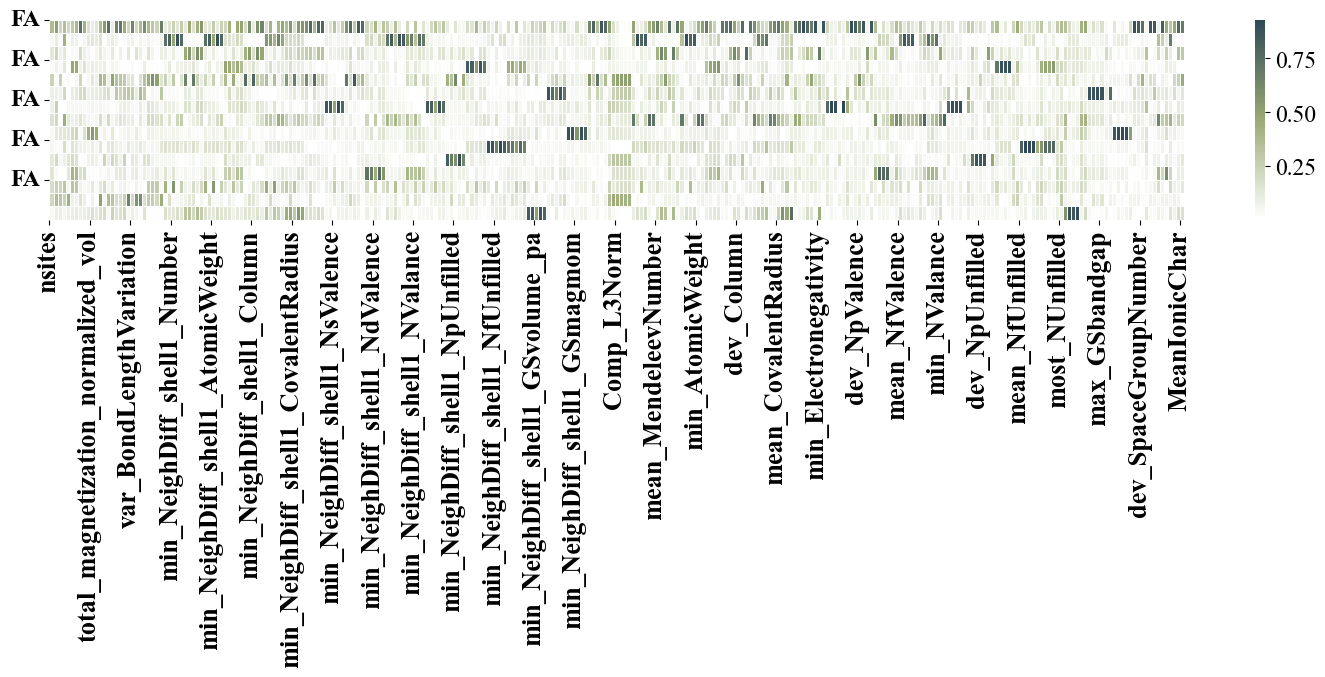



✓ Heatmap successfully generated.
✓ Figure saved at: ./figures/FA_LoadingMatrix_Heatmap.svg


In [9]:
FA_heatmap_generator.plot_heatmap(method="FA")  # Plot the heatmap

### 3.1 Explanation of Steps:
- **Heatmap Generation**: Using the `PCA_FA_LoadingMatrixHeatmap` class, we load the PCA and FA results from CSV files and plot heatmaps.
- **Method**: The method argument specifies whether the heatmap corresponds to PCA or FA, ensuring the correct data and colormap are used.

## Step 4: Pearson Correlation Calculation and InterCorrelation Plotting

This code calculates the Pearson correlation coefficients for the PCA and Factor Analysis (FA) results and saves the outcomes to CSV files for further analysis and visualization. Using the `PearsonCorrelationCalculator` class, it processes the input data for both PCA and FA, saving the correlation results to specified file paths. The code then loads a configuration file in JSON format, which contains the parameters needed for visualizing the plots. Finally, the `InterCorrelationPlotter` class is used to generate the inter-correlation heatmaps for PCA and FA, saving them as high-quality SVG plots. This entire process completes the workflow from data calculation to result visualization.

### 4.1 Running Pearson Correlation Calculation

In this step, we calculate the Pearson correlation coefficient matrices for both PCA and Factor Analysis datasets. The calculation is done using the `PearsonCorrelationCalculator` class, and the results are saved into separate `.csv` files for each analysis.


In [10]:
from FeatureProcessor import PearsonCorrelationCalculator

pca_input_file  = './reduction_outputs/pca_results.csv'
pca_output_file = './reduction_outputs/pca_InterCorrelation.csv'

pca_correlation_calculator = PearsonCorrelationCalculator(pca_input_file, pca_output_file)
pca_correlation = pca_correlation_calculator.run()
pca_correlation

✓ Data Matrix has Loaded.
[1/3] Calculating Pearson correlation matrix...
[2/3] Correlation matrix calculation completed.
[3/3] Correlation matrix saved to ./reduction_outputs/pca_InterCorrelation.csv


0         1         2         3         4         5         6   \
0   1.000000  0.093528  0.198341  0.193613 -0.449591  0.014625  0.057693   
1   0.093528  1.000000  0.078089 -0.213737  0.065745 -0.167227  0.093524   
2   0.198341  0.078089  1.000000 -0.207703 -0.190230 -0.042759 -0.109319   
3   0.193613 -0.213737 -0.207703  1.000000  0.113520  0.083784  0.087869   
4  -0.449591  0.065745 -0.190230  0.113520  1.000000 -0.130875  0.104435   
5   0.014625 -0.167227 -0.042759  0.083784 -0.130875  1.000000 -0.076574   
6   0.057693  0.093524 -0.109319  0.087869  0.104435 -0.076574  1.000000   
7  -0.329349 -0.333249 -0.116730 -0.019838  0.267729 -0.283296  0.098653   
8   0.134435  0.227147  0.241121 -0.348311 -0.198820 -0.130220 -0.103646   
9  -0.089362 -0.275191 -0.300579 -0.185307  0.223590  0.088534  0.039741   
10 -0.094920 -0.048514 -0.060696  0.092147  0.208412  0.061292  0.216230   
11 -0.135716  0.177246 -0.003200 -0.072896 -0.013158 -0.187402 -0.061039   
12  0.089312 -0.012308 -0.093949  0.061902 -0.078730 -0.167655 -0.053927   
13 -0.106755  0.030768 -0.125801  0.048078  0.272893 -0.121115 -0.127721   
14 -0.308974 -0.001195  0.014231 -0.037432  0.026122  0.075419 -0.016602   
15 -0.251250  0.254505 -0.074227  0.081328  0.172003  0.046394  0.094695   
16 -0.041886  0.285901 -0.084010  0.102517  0.109455  0.028455  0.055084   
17 -0.506463  0.028073 -0.006938 -0.013252  0.185819  0.052247  0.112609   

          7         8         9         10        11        12        13  \
0  -0.329349  0.134435 -0.089362 -0.094920 -0.135716  0.089312 -0.106755   
1  -0.333249  0.227147 -0.275191 -0.048514  0.177246 -0.012308  0.030768   
2  -0.116730  0.241121 -0.300579 -0.060696 -0.003200 -0.093949 -0.125801   
3  -0.019838 -0.348311 -0.185307  0.092147 -0.072896  0.061902  0.048078   
4   0.267729 -0.198820  0.223590  0.208412 -0.013158 -0.078730  0.272893   
5  -0.283296 -0.130220  0.088534  0.061292 -0.187402 -0.167655 -0.121115   
6   0.098653 -0.103646  0.039741  0.216230 -0.061039 -0.053927 -0.127721   
7   1.000000 -0.044882 -0.071693  0.073956 -0.004869 -0.054220  0.172844   
8  -0.044882  1.000000 -0.151698 -0.032863  0.176640 -0.145323 -0.019985   
9  -0.071693 -0.151698  1.000000  0.160629  0.075058  0.002224 -0.019893   
10  0.073956 -0.032863  0.160629  1.000000 -0.195724 -0.175381  0.065676   
11 -0.004869  0.176640  0.075058 -0.195724  1.000000  0.061679  0.021298   
12 -0.054220 -0.145323  0.002224 -0.175381  0.061679  1.000000  0.381281   
13  0.172844 -0.019985 -0.019893  0.065676  0.021298  0.381281  1.000000   
14  0.080606 -0.209790 -0.150708 -0.258344 -0.013486  0.009721  0.217398   
15 -0.035630 -0.021513 -0.114453  0.104690  0.018472  0.018957  0.041712   
16 -0.103984 -0.048639 -0.086799  0.070217  0.011060  0.004668  0.014635   
17  0.123464  0.046370 -0.095829  0.105933  0.021340  0.035211  0.068782   

          14        15        16        17  
0  -0.308974 -0.251250 -0.041886 -0.506463  
1  -0.001195  0.254505  0.285901  0.028073  
2   0.014231 -0.074227 -0.084010 -0.006938  
3  -0.037432  0.081328  0.102517 -0.013252  
4   0.026122  0.172003  0.109455  0.185819  
5   0.075419  0.046394  0.028455  0.052247  
6  -0.016602  0.094695  0.055084  0.112609  
7   0.080606 -0.035630 -0.103984  0.123464  
8  -0.209790 -0.021513 -0.048639  0.046370  
9  -0.150708 -0.114453 -0.086799 -0.095829  
10 -0.258344  0.104690  0.070217  0.105933  
11 -0.013486  0.018472  0.011060  0.021340  
12  0.009721  0.018957  0.004668  0.035211  
13  0.217398  0.041712  0.014635  0.068782  
14  1.000000  0.109565  0.056113  0.145474  
15  0.109565  1.000000  0.906632  0.541985  
16  0.056113  0.906632  1.000000  0.136803  
17  0.145474  0.541985  0.136803  1.000000

In [11]:
fa_input_file  = './reduction_outputs/factor_results.csv'
fa_output_file = './reduction_outputs/factor_InterCorrelation.csv'

fa_correlation_calculator = PearsonCorrelationCalculator(fa_input_file, fa_output_file)
fa_correlation = fa_correlation_calculator.run()
fa_correlation

✓ Data Matrix has Loaded.
[1/3] Calculating Pearson correlation matrix...
[2/3] Correlation matrix calculation completed.
[3/3] Correlation matrix saved to ./reduction_outputs/factor_InterCorrelation.csv


0         1         2         3         4         5         6   \
0   1.000000  0.052211 -0.057688  0.096681 -0.422695 -0.335196 -0.100126   
1   0.052211  1.000000 -0.000407  0.086493 -0.035036 -0.037666  0.007627   
2  -0.057688 -0.000407  1.000000  0.049309  0.121975  0.124142  0.248223   
3   0.096681  0.086493  0.049309  1.000000  0.033993 -0.044799 -0.028131   
4  -0.422695 -0.035036  0.121975  0.033993  1.000000  0.040006  0.071090   
5  -0.335196 -0.037666  0.124142 -0.044799  0.040006  1.000000  0.048865   
6  -0.100126  0.007627  0.248223 -0.028131  0.071090  0.048865  1.000000   
7   0.089589 -0.065259 -0.074906  0.075841  0.039236 -0.146578 -0.042194   
8   0.135701  0.121019  0.056809  0.105478 -0.036398 -0.006148  0.120592   
9   0.184266 -0.195912 -0.098921 -0.110993 -0.042540  0.006696 -0.033682   
10 -0.167332 -0.017704 -0.004070  0.032407 -0.016072 -0.200138 -0.061092   
11 -0.091996  0.121447  0.045859 -0.149980 -0.070411 -0.148946  0.009339   
12  0.134211  0.025442  0.092260 -0.090948 -0.104699  0.026053  0.014126   
13 -0.048440 -0.030718 -0.218258 -0.148864  0.107837 -0.150962 -0.124995   
14 -0.116155 -0.011296  0.107521 -0.014282  0.089835  0.009282  0.106143   
15 -0.159229  0.243114 -0.057416  0.185125  0.094742 -0.117871 -0.119296   
16  0.004619  0.259072 -0.012899  0.171373  0.092629 -0.096398 -0.122422   
17 -0.383041  0.054766 -0.109111  0.093299  0.037938 -0.084734 -0.036246   

          7         8         9         10        11        12        13  \
0   0.089589  0.135701  0.184266 -0.167332 -0.091996  0.134211 -0.048440   
1  -0.065259  0.121019 -0.195912 -0.017704  0.121447  0.025442 -0.030718   
2  -0.074906  0.056809 -0.098921 -0.004070  0.045859  0.092260 -0.218258   
3   0.075841  0.105478 -0.110993  0.032407 -0.149980 -0.090948 -0.148864   
4   0.039236 -0.036398 -0.042540 -0.016072 -0.070411 -0.104699  0.107837   
5  -0.146578 -0.006148  0.006696 -0.200138 -0.148946  0.026053 -0.150962   
6  -0.042194  0.120592 -0.033682 -0.061092  0.009339  0.014126 -0.124995   
7   1.000000 -0.032078 -0.159943  0.044461  0.113143 -0.320912 -0.081921   
8  -0.032078  1.000000 -0.040015 -0.020375 -0.009651  0.017507  0.059458   
9  -0.159943 -0.040015  1.000000  0.044284 -0.064697 -0.064629  0.088048   
10  0.044461 -0.020375  0.044284  1.000000 -0.082511 -0.169774  0.401631   
11  0.113143 -0.009651 -0.064697 -0.082511  1.000000  0.005014 -0.009115   
12 -0.320912  0.017507 -0.064629 -0.169774  0.005014  1.000000 -0.110498   
13 -0.081921  0.059458  0.088048  0.401631 -0.009115 -0.110498  1.000000   
14  0.124276  0.029288 -0.207513 -0.056092  0.024641  0.108828  0.005350   
15  0.092853  0.030255 -0.022033  0.157473  0.032968 -0.027626 -0.035389   
16  0.002134  0.008076 -0.004080  0.064679 -0.018606  0.012201 -0.046771   
17  0.213750  0.054950 -0.043602  0.240890  0.114462 -0.089163  0.010071   

          14        15        16        17  
0  -0.116155 -0.159229  0.004619 -0.383041  
1  -0.011296  0.243114  0.259072  0.054766  
2   0.107521 -0.057416 -0.012899 -0.109111  
3  -0.014282  0.185125  0.171373  0.093299  
4   0.089835  0.094742  0.092629  0.037938  
5   0.009282 -0.117871 -0.096398 -0.084734  
6   0.106143 -0.119296 -0.122422 -0.036246  
7   0.124276  0.092853  0.002134  0.213750  
8   0.029288  0.030255  0.008076  0.054950  
9  -0.207513 -0.022033 -0.004080 -0.043602  
10 -0.056092  0.157473  0.064679  0.240890  
11  0.024641  0.032968 -0.018606  0.114462  
12  0.108828 -0.027626  0.012201 -0.089163  
13  0.005350 -0.035389 -0.046771  0.010071  
14  1.000000 -0.017679  0.006493 -0.054441  
15 -0.017679  1.000000  0.906632  0.541985  
16  0.006493  0.906632  1.000000  0.136803  
17 -0.054441  0.541985  0.136803  1.000000

### 4.2 Loading Configuration File

This step involves loading the visual configuration settings from the `analysis_visual_config.json file`. The settings are used to customize the appearance of the plots generated in the next step.

In [12]:
import json
with open('analysis_visual_config.json') as config_file:
    config = json.load(config_file)

### 4.3 Generating InterCorrelation Plots

After calculating the Pearson correlations and loading the configuration, we generate and save heatmap plots for both the PCA and Factor Analysis correlation matrices. The plots are customized based on the settings in the configuration file and are saved as `.png` files.

In [13]:
from FeatureProcessor import InterCorrelationPlotter
import warnings
# Ignore the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Select the analysis type
analysis_type = 'factor_analysis'  # or 'pca_analysis'
plotter = InterCorrelationPlotter(config[analysis_type], "F")
plotter.plot("./reduction_outputs/factor_InterCorrelation.csv", "./figures/factor_InterCorrelation.png")
print("FA  correlation plot has been generated and saved to './figures/factor_InterCorrelation.png'.")
plt.close()

# Select the analysis type
analysis_type = 'pca_analysis'
plotter = InterCorrelationPlotter(config[analysis_type], "P")
plotter.plot("./reduction_outputs/pca_InterCorrelation.csv", "./figures/pca_InterCorrelation.png")
print("PCA correlation plot has been generated and saved to './figures/pca_InterCorrelation.png'.")
plt.close()

FA  correlation plot has been generated and saved to './figures/factor_InterCorrelation.png'.
PCA correlation plot has been generated and saved to './figures/pca_InterCorrelation.png'.


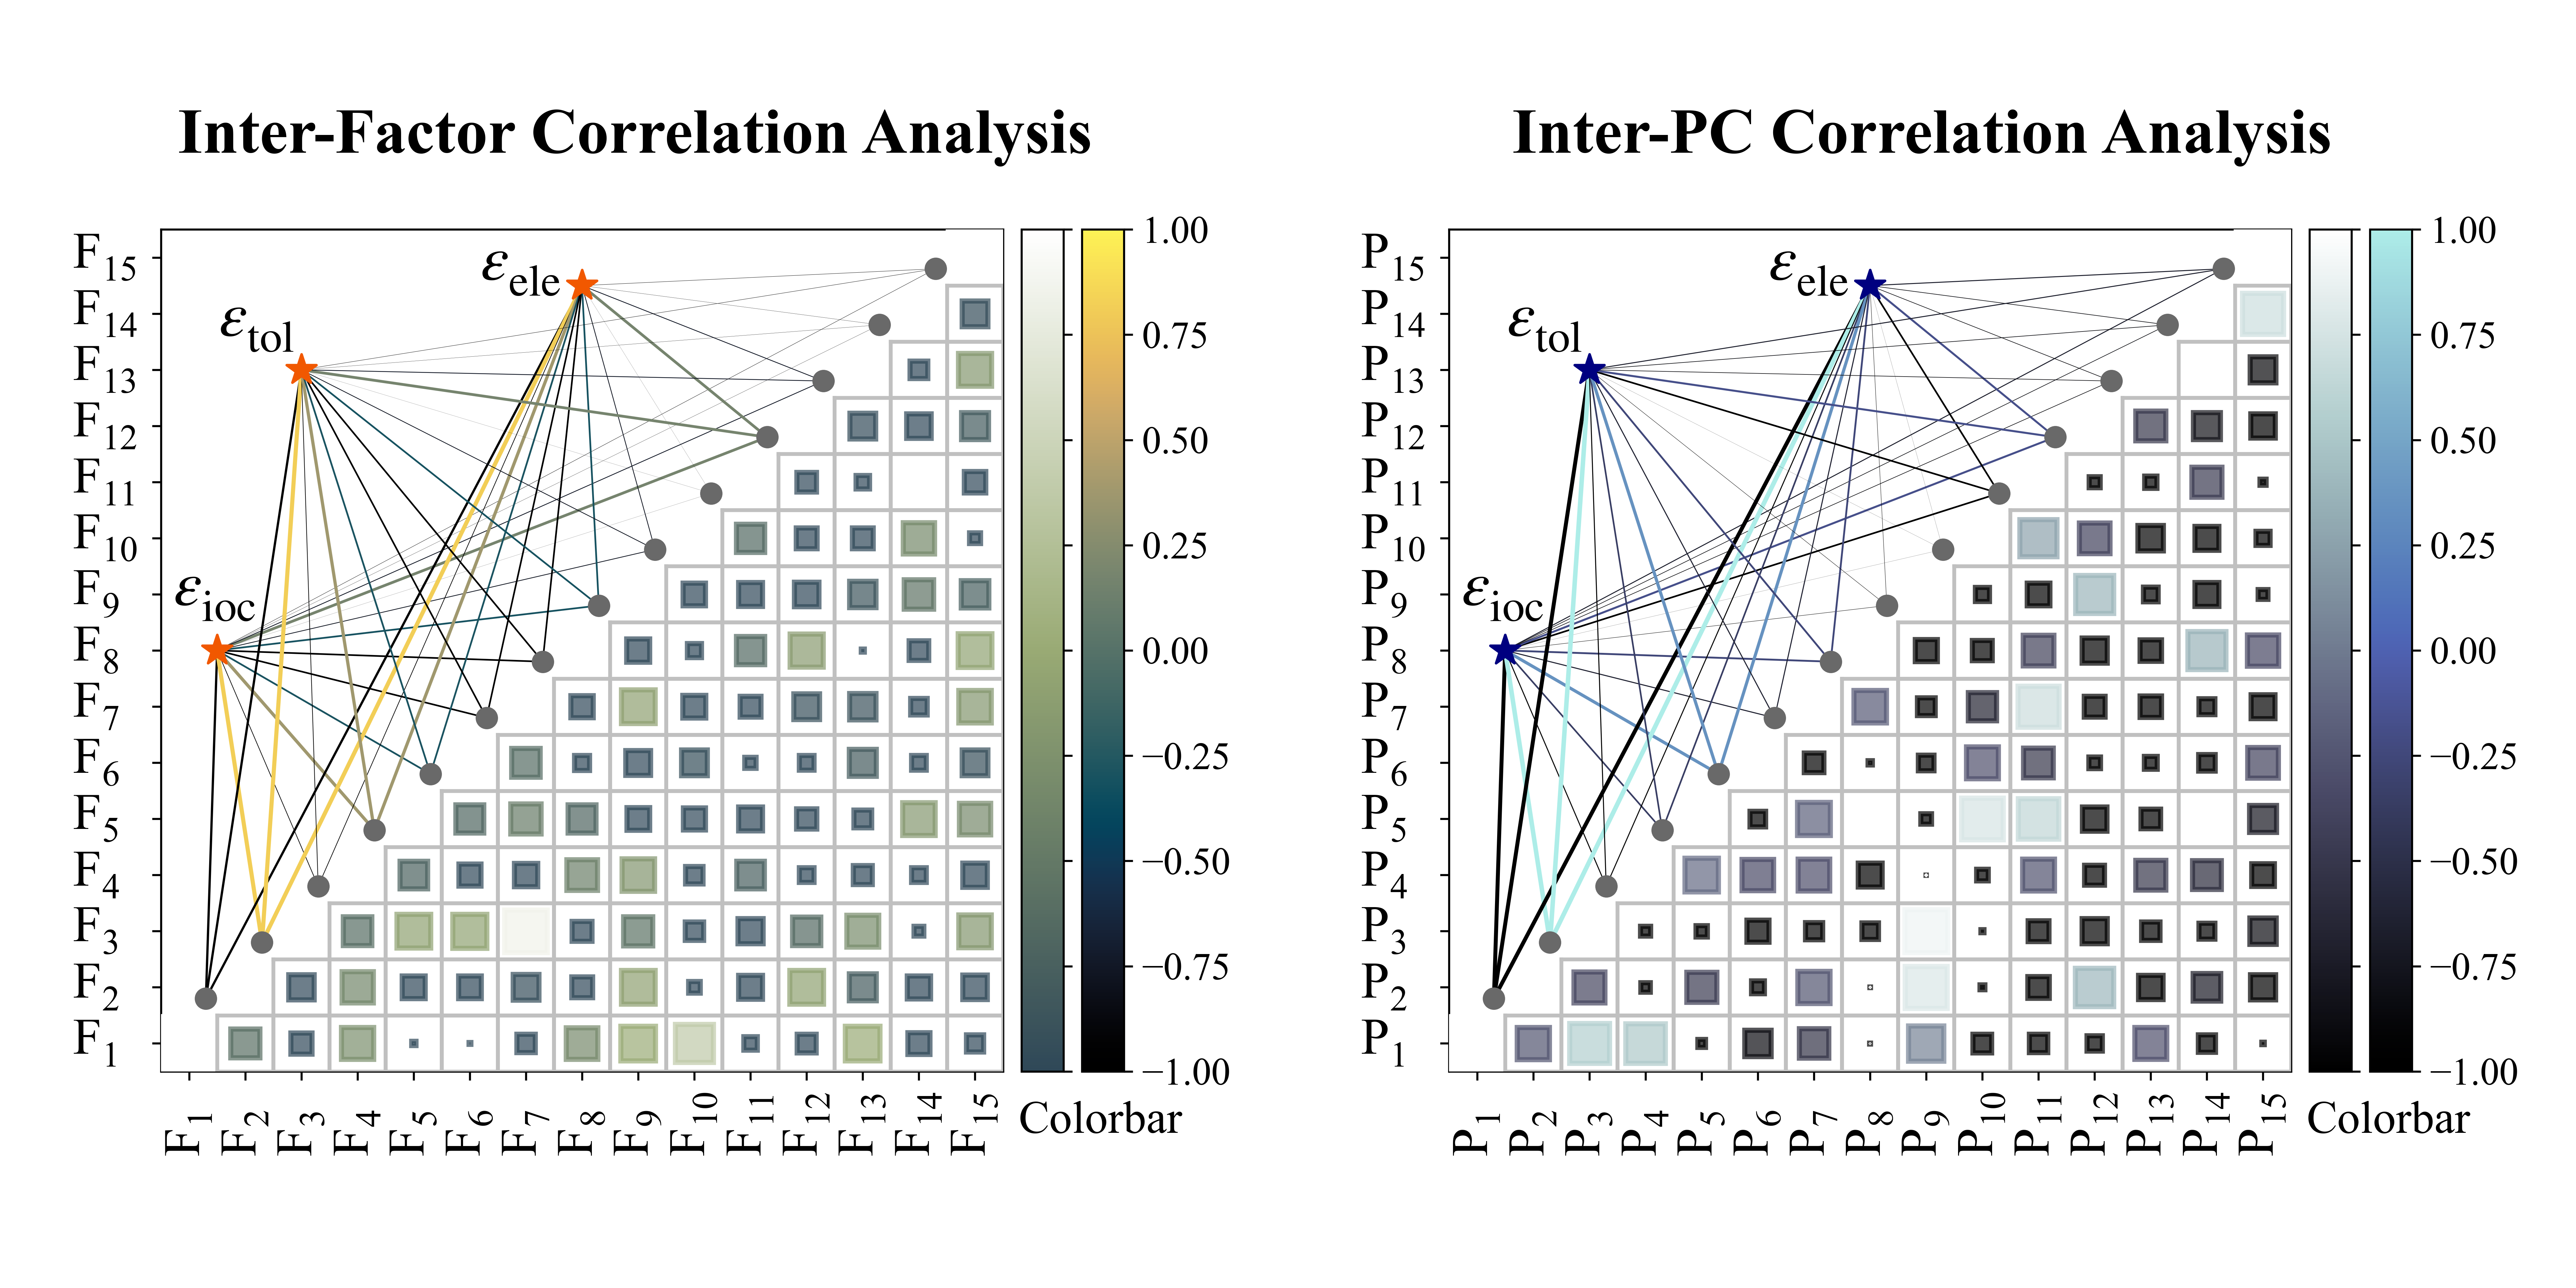

In [14]:
from PIL import Image

# Open the two images
image1 = Image.open('./figures/factor_InterCorrelation.png')
image2 = Image.open('./figures/pca_InterCorrelation.png')

# Get the size of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new image with combined width and the height of the largest image
combined_width = width1 + width2
combined_height = max(height1, height2)

# Create a new blank image with the combined size
combined_image = Image.new('RGB', (combined_width, combined_height))

# Paste the first image at the left (0,0) position
combined_image.paste(image1, (0, 0))

# Paste the second image at the right (width1, 0) position
combined_image.paste(image2, (width1, 0))

# Save the combined image
combined_image.save('./figures/combined_intercorrelation.png')
combined_image

### 4.4 Explanation of Steps:
- **PCA and FA Pearson Correlation Calculation**: This step involves calculating the Pearson correlation coefficients for both PCA and Factor Analysis results using the `PearsonCorrelationCalculator` class. These correlations are saved into CSV files for further analysis and visualization.
- **InterCorrelation Plotting**: The `InterCorrelationPlotter` class is used to generate and save the inter-correlation heatmaps for PCA and FA results. These plots are saved as SVG files for high-quality vector graphics.
- **Config File**: A JSON configuration file (`analysis_visual_config.json`) is used to load settings for the plot, allowing flexible customization without changing the code itself.

## Conclusion

This script effectively demonstrates the use of dimensionality reduction techniques (PCA and Factor Analysis) to process data, visualize results with customized colormaps, and generate heatmaps for deeper insights into the data. The use of colormap visualizations helps in understanding the spread of values across the components, and the heatmaps offer a clear, detailed view of the loadings associated with each component. Then, we first compute the Pearson correlation matrices for the PCA and Factor Analysis datasets and save them as .csv files. Then, we load the visualization configuration settings from a `JSON` file. Finally, we generate heatmap plots for both datasets based on these settings, and the plots are saved to the `./figures/ directory` as .`png` files. The entire process helps visualize the inter-correlation between different features.